In [13]:
from google.colab import files
uploaded = files.upload()


Saving employee_salaries.csv to employee_salaries (1).csv


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [15]:
df = pd.read_csv("employee_salaries.csv")
df.head()


,Job Title,Education Level,Experience,Location,Salary
0,Data Scientist,Master's,3,New York,95000
1,Software Engineer,Bachelor's,2,San Francisco,105000
2,Data Analyst,Bachelor's,1,Chicago,70000
3,ML Engineer,Master's,4,Seattle,120000
4,DevOps Engineer,Bachelor's,3,Austin,98000


In [16]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        10 non-null     object
 1   Education Level  10 non-null     object
 2   Experience       10 non-null     int64 
 3   Location         10 non-null     object
 4   Salary           10 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes


,0
Job Title,0
Education Level,0
Experience,0
Location,0
Salary,0


In [17]:
le = LabelEncoder()
for col in ['Job Title', 'Education Level', 'Location']:
    df[col] = le.fit_transform(df[col])


In [18]:
X = df.drop('Salary', axis=1)
y = df['Salary']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
ada = AdaBoostRegressor(random_state=42)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
ada.fit(X_train, y_train)


AdaBoostRegressor(random_state=42)

In [21]:
voting = VotingRegressor(estimators=[('rf', rf), ('gb', gb), ('ada', ada)])
voting.fit(X_train, y_train)


VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                            ('gb', GradientBoostingRegressor(random_state=42)),
                            ('ada', AdaBoostRegressor(random_state=42))])

In [22]:
models = {'Random Forest': rf, 'Gradient Boosting': gb, 'AdaBoost': ada, 'Voting Regressor': voting}

for name, model in models.items():
    preds = model.predict(X_test)
    print(f"{name} => R2 Score: {r2_score(y_test, preds):.4f}, RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}")


Random Forest => R2 Score: -0.0380, RMSE: 22923.52
Gradient Boosting => R2 Score: 0.1889, RMSE: 20263.38
AdaBoost => R2 Score: 0.5062, RMSE: 15811.39
Voting Regressor => R2 Score: 0.2427, RMSE: 19580.09


In [23]:
import joblib
joblib.dump(voting, 'salary_predictor_model.pkl')


['salary_predictor_model.pkl']

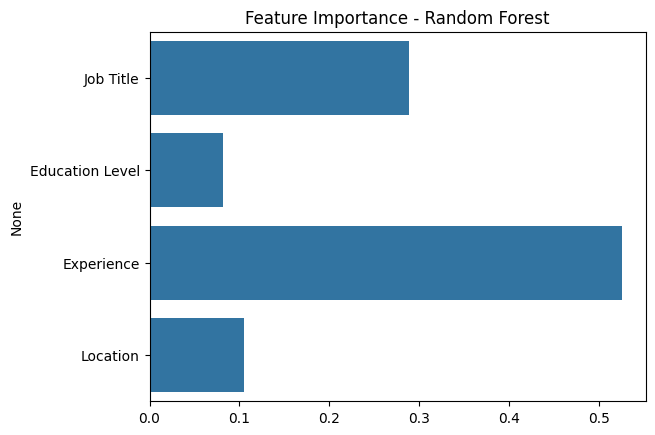

In [24]:
importances = rf.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()
